# Interaktive Bildvisualisierung mit napari
[napari](https://napari.org/) ist ein Python-basierter Bildbetrachter. Heute werden wir ihn verwenden, indem wir ihn von einem Jupyter Notebook aus fernsteuern.

Siehe auch
* [napari Tutorials](https://napari.org/tutorials/index.html)
* [Multi-dimensionale Bildvisualisierung in Python mit napari [NEUBIAS Academy@Home] Webinar](https://www.youtube.com/watch?v=VgvDSq5aCDQ)

Zum Öffnen eines Bildes verwenden wir weiterhin scikit-image:

In [1]:
import napari

from skimage.io import imread

image = imread('../../data/Haase_MRT_tfl3d1.tif')

# print out the spatial dimensions of the image
print(image.shape)

(192, 256, 256)


In [2]:
# Create an empty viewer
viewer = napari.Viewer()

In [3]:
# Add a new layer containing an image
viewer.add_image(image)

<Image layer 'image' at 0x1d5a7bb9af0>

Mit diesem Befehl können wir einen Screenshot von napari machen und ihn in unserem Notebook speichern.

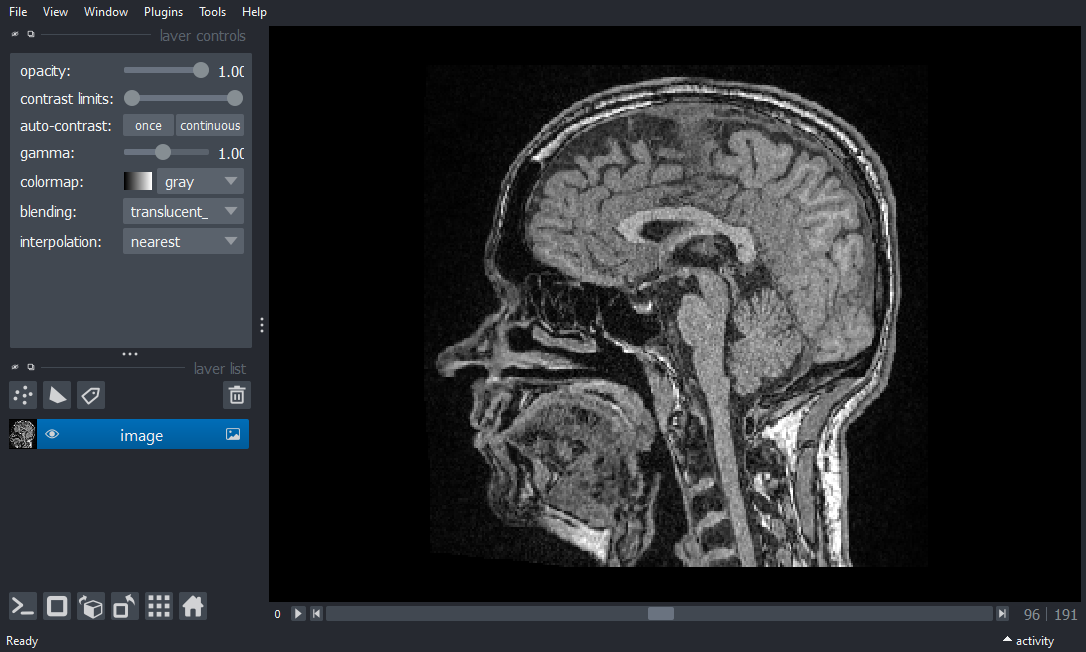

In [4]:
napari.utils.nbscreenshot(viewer)

## Schneiden

Wir können den Z-Schnitt-Schieberegler programmatisch wie folgt bewegen.

In [5]:
dims = viewer.dims.current_step
dims

(96, 128, 128)

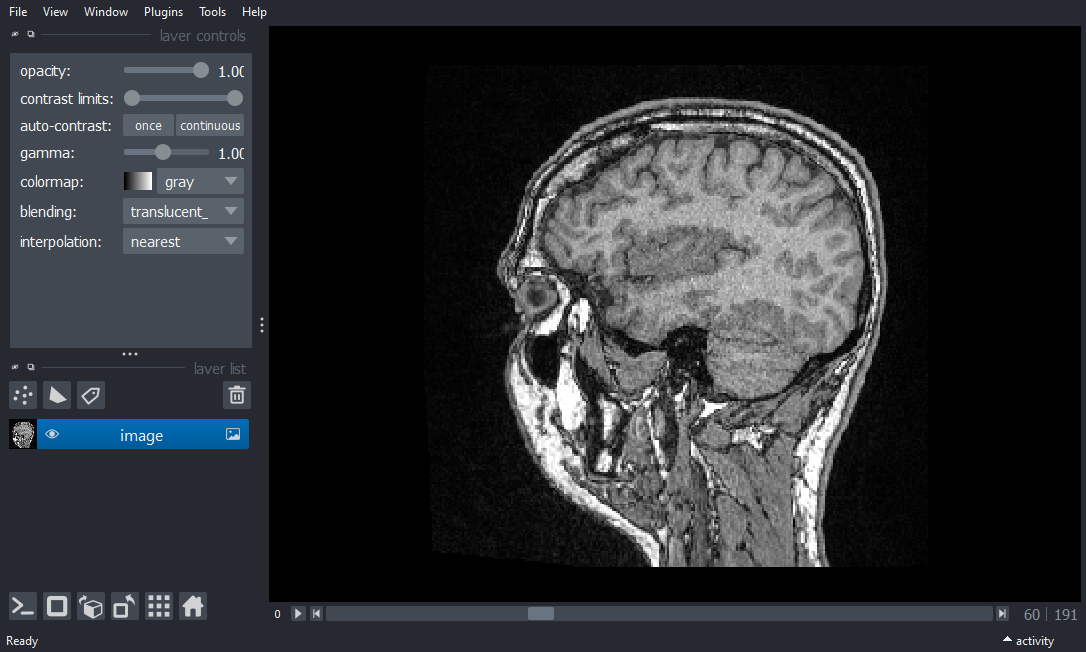

In [6]:
# modify Z-slice position
dims = list(dims)
dims[0] = 60
viewer.dims.current_step = dims

# take another screenshot
napari.utils.nbscreenshot(viewer)

## 3D-Rendering

Wir können auch die 3D-Ansicht programmatisch aktivieren.

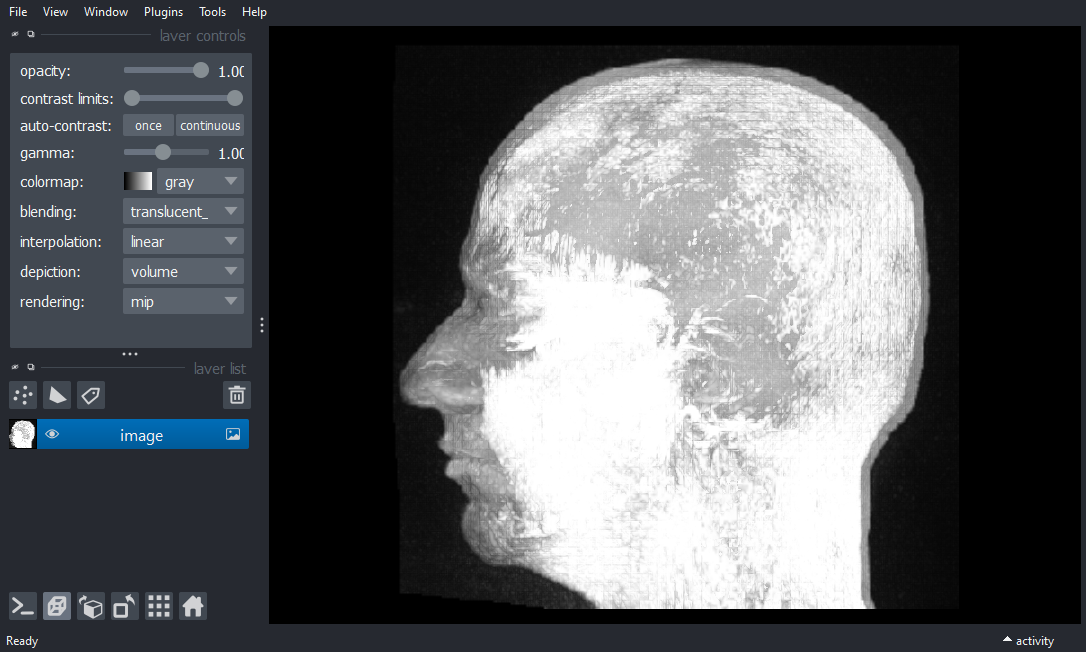

In [7]:
viewer.dims.ndisplay = 3

napari.utils.nbscreenshot(viewer)

## Kameraausrichtung

Um die Kameraposition zu ändern, wird empfohlen, die Kamera auszudrucken, z.B. nachdem eine Änderung manuell vorgenommen wurde. Dies ermöglicht es Ihnen zu verstehen, was `center`, `zoom`, `angles` usw. bedeuten. Sie können diese Parameter dann mit Python ändern.

In [8]:
viewer.camera

Camera(center=(95.5, 127.5, 127.5), zoom=2.2191406249999996, angles=(0.0, 0.0, 90.00000000000001), perspective=0.0, interactive=True)

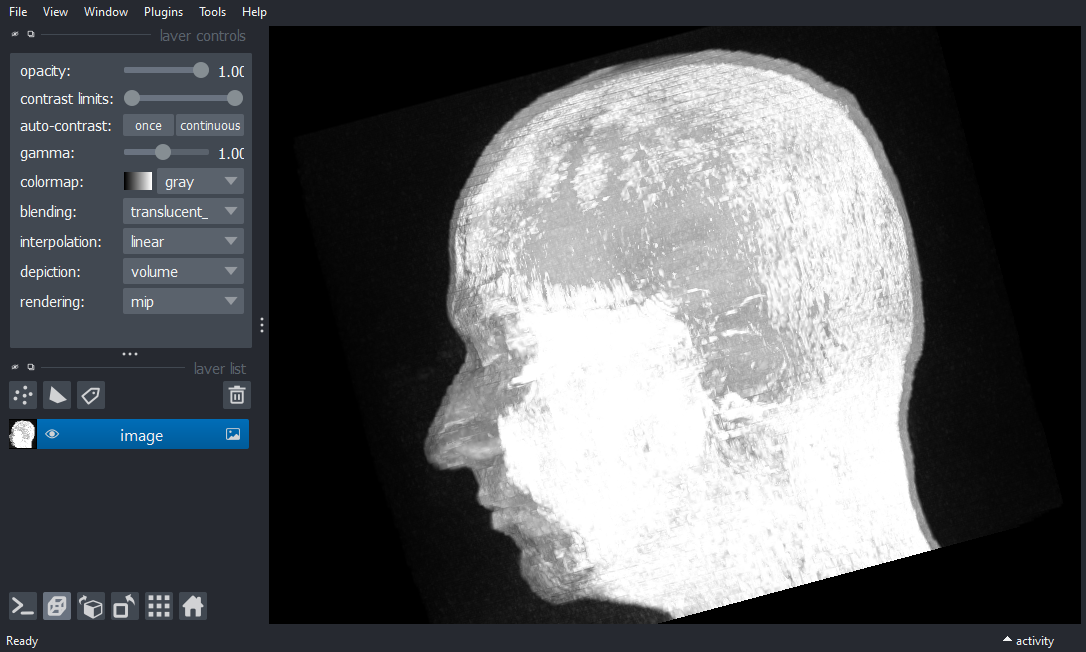

In [9]:
viewer.camera.angles = (15, -15, 90)

napari.utils.nbscreenshot(viewer)

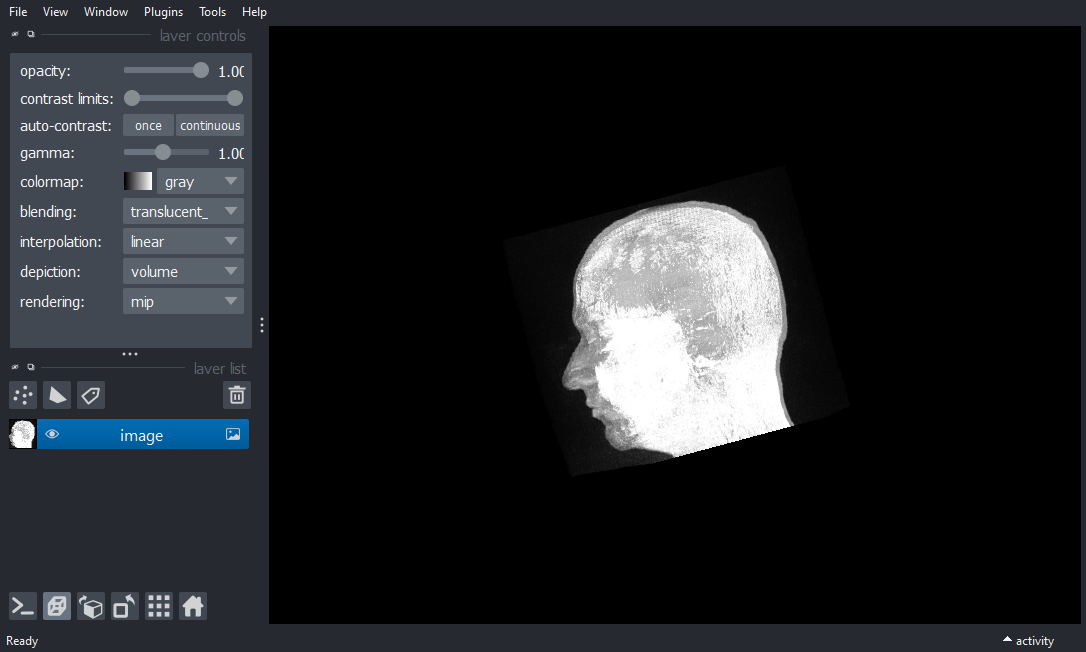

In [10]:
viewer.camera.zoom = 1

napari.utils.nbscreenshot(viewer)

In [11]:
viewer.dims.ndisplay = 2

dims[0] = 96
viewer.dims.current_step = dims

## Ebeneneigenschaften

Zum Ändern von Farbkarten / Lookup-Tabellen und Bildanzeigebereich können Sie Befehle wie diese aufrufen.

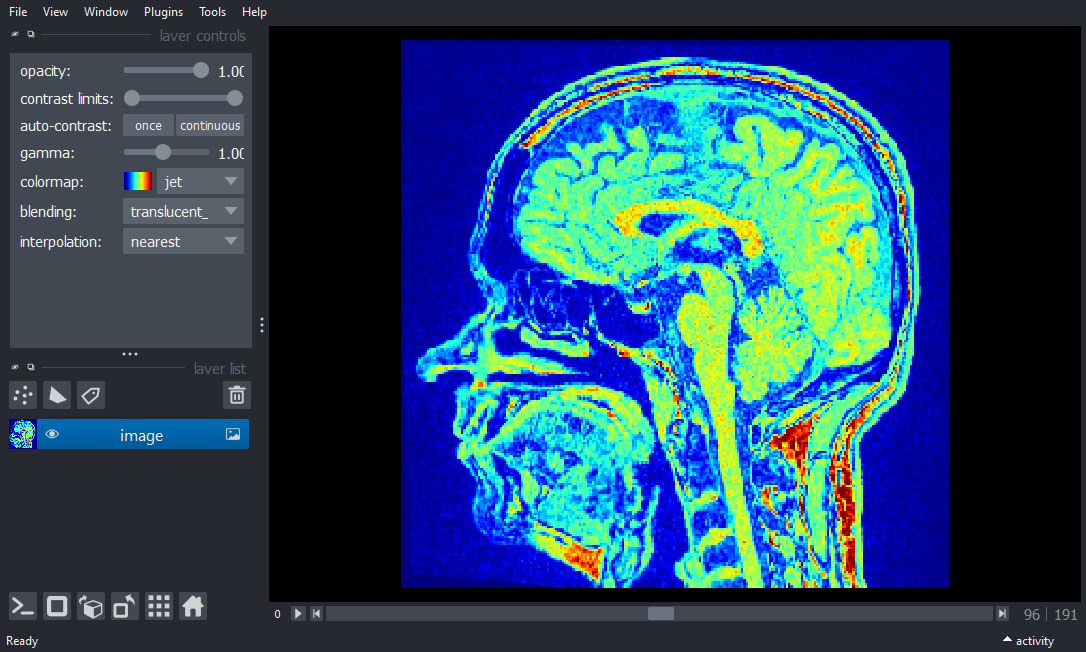

In [12]:
image_layer = viewer.layers[0]

image_layer.colormap = "jet"

napari.utils.nbscreenshot(viewer)

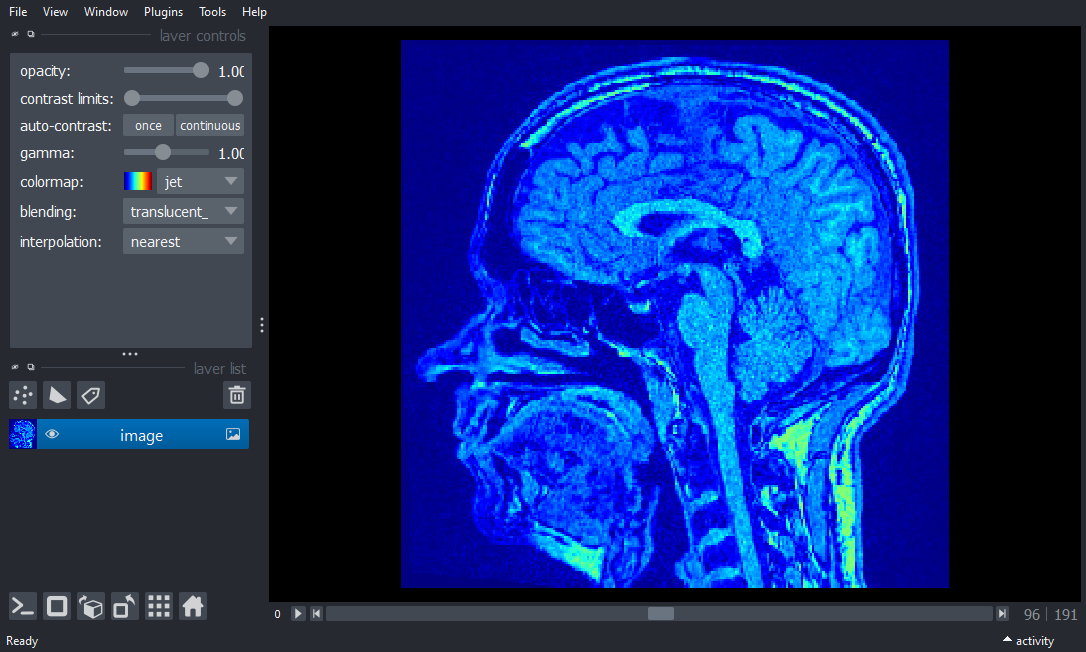

In [13]:
image_layer.contrast_limits = [0, 500]

napari.utils.nbscreenshot(viewer)

In [14]:
image_layer.colormap = 'gray'

## Visualisierung von Segmentierungsergebnissen

Segmentierungsergebnisse werden in Napari typischerweise als Etikettenbilder angezeigt. In einem Etikettenbild entsprechen die Intensitäten dem Objekt (der Klasse), zu dem ein Pixel gehört. Beispielsweise gehört bei einer semantischen Segmentierung ein Pixel mit der Intensität 1 zur Kategorie 1 und ein Pixel mit der Intensität 2 zur Kategorie 2. Bei der Instanzsegmentierung gehört ein Pixel mit der Intensität 1 zu Objekt 1. Ein Pixel mit der Intensität 2 gehört zu Objekt 2.

Etikettenbilder können mit dem Befehl `viewer.add_labels()` in die Ebenenliste von Napari eingefügt werden.

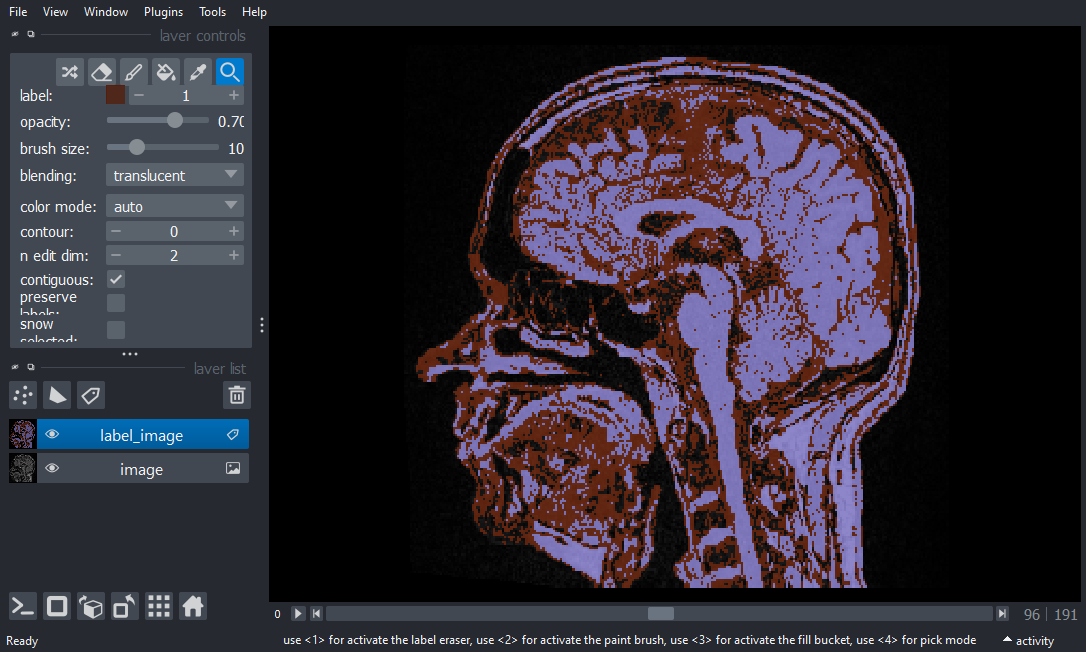

In [15]:
label_image = (image > 50) * 1 + (image > 110) * 2

labels_layer = viewer.add_labels(label_image)

napari.utils.nbscreenshot(viewer)

Auch Etikettenebenen können entsprechend modifiziert werden.

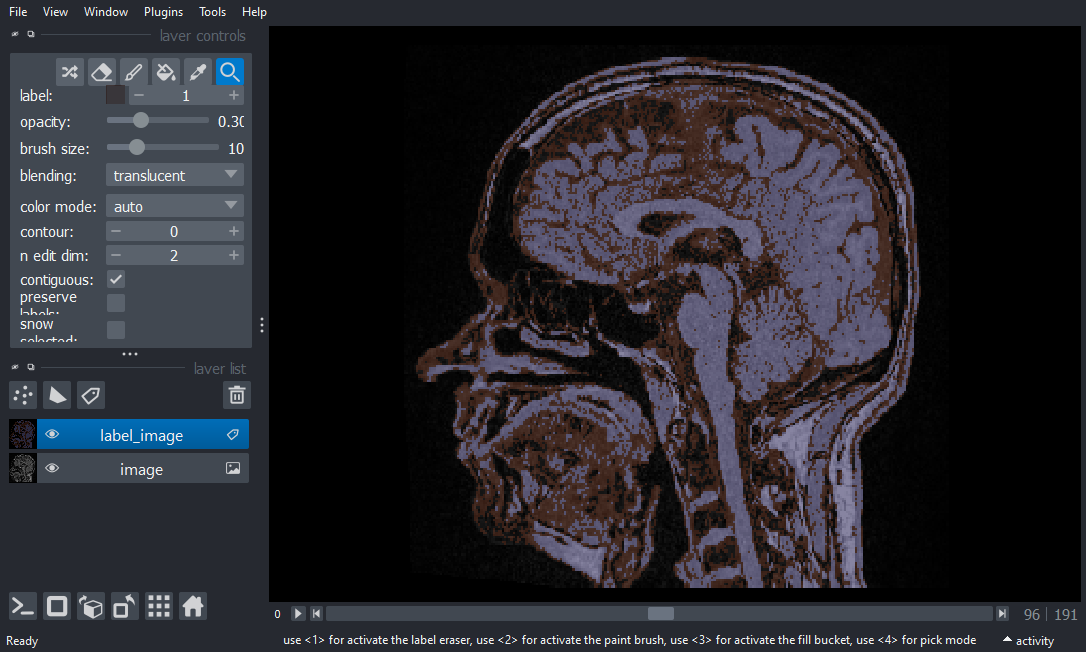

In [16]:
labels_layer.opacity = 0.3

napari.utils.nbscreenshot(viewer)

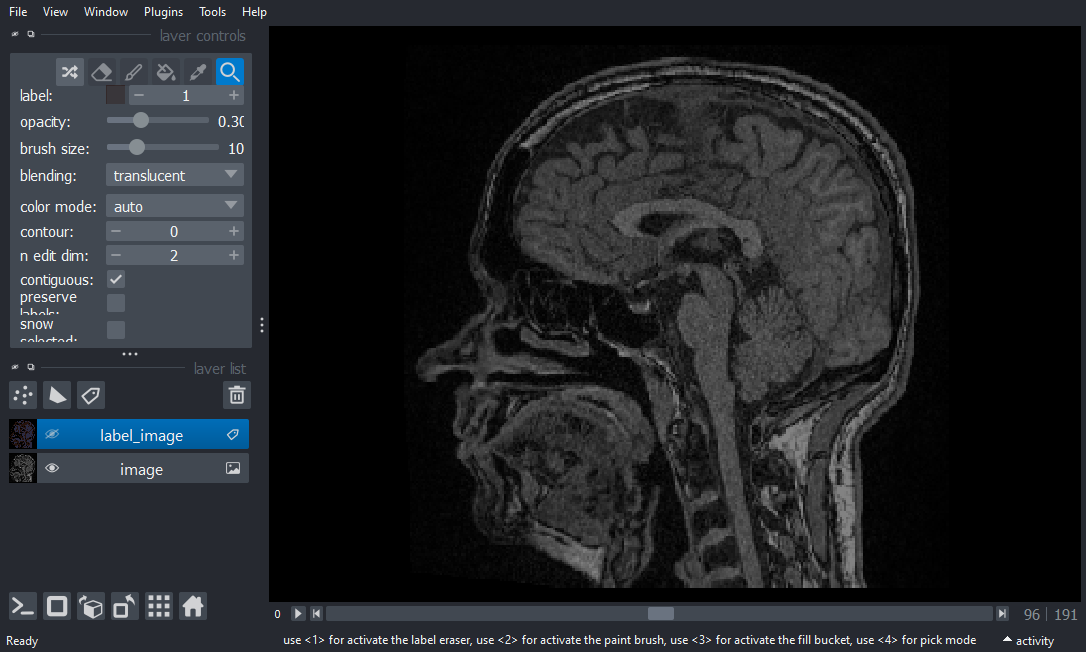

In [17]:
labels_layer.visible = False

napari.utils.nbscreenshot(viewer)

## Entfernen von Ebenen
Zu guter Letzt können wir auch aufräumen und Ebenen entfernen.

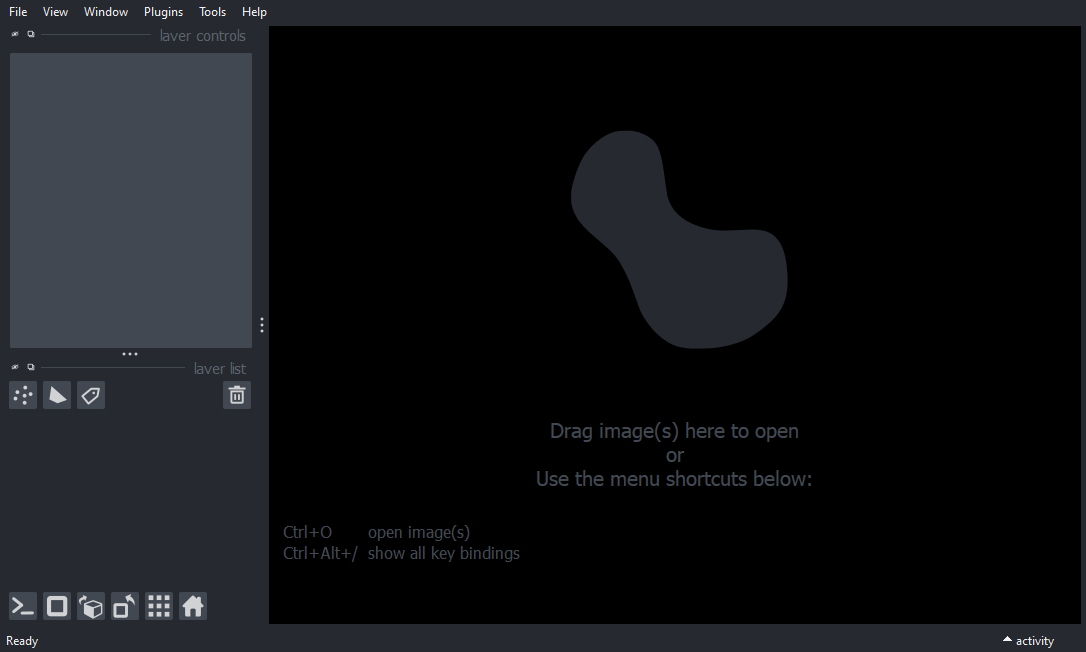

In [18]:
for l in list(viewer.layers):
    viewer.layers.remove(l)
    
napari.utils.nbscreenshot(viewer)

## Übung
Starten Sie ein neues Notebook, importieren Sie napari, laden Sie das Bild `../data/hela-cells.tif` und fügen Sie seine drei Kanäle unabhängig voneinander als drei Ebenen zu napari hinzu. Spielen Sie anschließend mit der Farbkarte und dem Blending in der Benutzeroberfläche. Können Sie es ähnlich wie ImageJ aussehen lassen? Schauen Sie sich auch das napari [Image Layer Tutorial](https://napari.org/tutorials/fundamentals/image.html) an. Können Sie eine solche Visualisierung auch programmieren?